## Setup

In [ ]:
!pip install swifter
!pip install tensorflow==2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0rc0)
ERROR: No matching distribution found for tensorflow==2.0.0


In [ ]:
import os
os.kill(os.getpid(), 9)

# Data Loading

In [ ]:

import pandas as pd
import os
from os.path import exists
import zipfile
import numpy as np
from datetime import datetime

In [ ]:
SEED=42

In [ ]:
# !gdown https://drive.google.com/uc?id=1kl65YOvoSAMSgszQQbua2q4Zwe1HgPct
# !unzip -o "data.zip"  -d  "/content"

# movie_10k_df = pd.read_csv("movies_min.csv")
# amazon_df =pd.read_csv('amazon_min.csv')
# book_df=pd.read_csv("book_min.csv")
# food_df = pd.read_csv('food_min.csv')
# ecommerce_df=pd.read_csv('ecom_min.csv')
# ciao_df=pd.read_csv('ciao_min.csv')

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
!gdown https://drive.google.com/uc?id=1Z7TljjdpUOHdxUdS2GiJMGdmMJ8hbCRt


Downloading...
From: https://drive.google.com/uc?id=1Z7TljjdpUOHdxUdS2GiJMGdmMJ8hbCRt
To: /content/fashon.zip
100% 593M/593M [00:06<00:00, 98.2MB/s]


In [ ]:
!unzip -o "fashon.zip"  -d  "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/myntradataset/images/5813.jpg  
  inflating: /content/myntradataset/images/58131.jpg  
  inflating: /content/myntradataset/images/58132.jpg  
  inflating: /content/myntradataset/images/58133.jpg  
  inflating: /content/myntradataset/images/58135.jpg  
  inflating: /content/myntradataset/images/58136.jpg  
  inflating: /content/myntradataset/images/58137.jpg  
  inflating: /content/myntradataset/images/58138.jpg  
  inflating: /content/myntradataset/images/58139.jpg  
  inflating: /content/myntradataset/images/5814.jpg  
  inflating: /content/myntradataset/images/58140.jpg  
  inflating: /content/myntradataset/images/58141.jpg  
  inflating: /content/myntradataset/images/58143.jpg  
  inflating: /content/myntradataset/images/58144.jpg  
  inflating: /content/myntradataset/images/58145.jpg  
  inflating: /content/myntradataset/images/58146.jpg  
  inflating: /content/myntradataset/images/58147.jpg  
  inflating: /co

#### Name of the file where user item interaction data avaiable?
- Column name should be in following name and order
- [ **id, [featues]** ]
- **id** should be name of **image**.Images are named as **id.jpeg**

In [ ]:
filename="myntradataset/styles.csv" #enter your filename with file path

In [ ]:
imagepath="myntradataset/images/"

### Code Setup

In [ ]:
item_df = pd.read_csv(filename,on_bad_lines='skip')
item_df=item_df.head(1000)

In [ ]:
item_df.head(1)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt


name of itemid

In [ ]:
itemid='id'

In [ ]:
features=['gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName']

In [ ]:
item_df['image'] = item_df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
item_df['image'] =imagepath+item_df['image'] 
item_df = item_df.reset_index(drop=True)

#Code

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg

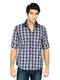

In [ ]:
import cv2
from IPython.display import display, Image
imagename=item_df['image'][0]
display(Image(filename=imagename))


## Load pretrained CNN model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import GlobalMaxPooling2D
tf.__version__

'2.11.0'

In [ ]:
df=item_df

reize images

In [ ]:
# from PIL import Image
# import os, sys

# path = imagepath
# dirs = os.listdir( path )
# final_size = 244;

# def resize_aspect_fit():
#     for item in dirs:
#          if item == '.DS_Store':
#              continue
#          if os.path.isfile(path+item):
#              im = Image.open(path+item)
#              f, e = os.path.splitext(path+item)
#              size = im.size
#              ratio = float(final_size) / max(size)
#              new_image_size = tuple([int(x*ratio) for x in size])
#              im = im.resize(new_image_size, Image.ANTIALIAS)
#              new_im = Image.new("RGB", (final_size, final_size))
#              new_im.paste(im, ((final_size-new_image_size[0])//2, (final_size-new_image_size[1])//2))
#              new_im.save(f , 'JPEG', quality=90)
# resize_aspect_fit()

In [ ]:
# Input Shape
img_width, img_height, _ = cv2.imread(df.iloc[0].image).shape

In [ ]:


# Pre-Trained Model
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

# Add Layer Embedding
model = tf.keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 3, 2, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
def generate_embedding(model, img_name):
    # Reshape
    img = image.load_img(img_name, target_size=(img_width, img_height))
    # Array conversion
    x   = image.img_to_array(img)
    # Expand Dimention
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)

In [ ]:
emb = generate_embedding(model, df.iloc[1].image)
emb.shape

1/1 [==============================] - 8s 8s/step


(2048,)

In [ ]:
import swifter

# Parallel apply
map_embeddings = df['image'].swifter.apply(lambda img: generate_embedding(model, img))
df_embs        = map_embeddings.apply(pd.Series)

print(df_embs.shape)
df_embs.head()

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step
(1000, 2048)


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.000000,3.539243,0.00000,1.094604,0.000000,0.000000,4.458520,2.446014,2.678123,0.0,...,0.424308,0.000000,0.000000,5.880390,0.000000,0.000000,6.428889,4.408073,0.950037,1.847207
1,1.879341,1.600881,0.09203,4.433078,0.000000,0.000000,3.030760,8.530589,5.498660,0.0,...,2.808286,0.000000,3.923500,3.183102,0.000000,0.000000,4.244196,3.268900,2.271738,5.433363
2,0.000000,0.311198,0.00000,3.808684,0.437043,7.112498,0.000000,0.000000,0.000000,0.0,...,0.218202,7.861299,1.655920,0.000000,0.000000,0.000000,4.703003,0.000000,2.340581,0.000000
3,0.588024,9.894599,0.00000,6.295322,1.783727,1.913138,0.000000,13.309926,7.805775,0.0,...,22.434402,0.000000,0.000000,0.000000,2.565923,3.330491,0.594357,1.130456,3.084226,7.608921
4,0.000000,1.882984,0.00000,5.122098,0.000000,0.000000,2.950298,6.626860,1.606633,0.0,...,2.504941,0.000000,1.274128,3.484575,0.786347,0.000000,1.597857,2.515499,0.068342,0.000000


similarity

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# Calcule DIstance Matriz
cosine_sim = 1-pairwise_distances(df_embs, metric='cosine')
cosine_sim[:4, :4]

array([[0.9999995 , 0.5813054 , 0.23863792, 0.4929409 ],
       [0.5813054 , 0.9999995 , 0.2395134 , 0.7227353 ],
       [0.23863792, 0.2395134 , 1.        , 0.2201165 ],
       [0.4929409 , 0.7227353 , 0.2201165 , 1.        ]], dtype=float32)

# Search by image

In [ ]:
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):


    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional

In [ ]:
indices = pd.Series(range(len(df)), index=df.index)


In [ ]:


# Function that get movie recommendations based on the cosine similarity score of movie genres
def recommendation(idx, df, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return indices.iloc[idx_rec].index, idx_sim



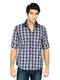

In [ ]:
import cv2
from IPython.display import display, Image
imagename=item_df['image'][0]
imageid=item_df['id'][0]
display(Image(filename=imagename))

In [ ]:
idx = df.index[df['id']==imageid][0]
idx

0

In [ ]:
idx_rec, idx_sim=recommendation(idx, df, top_n = 10)

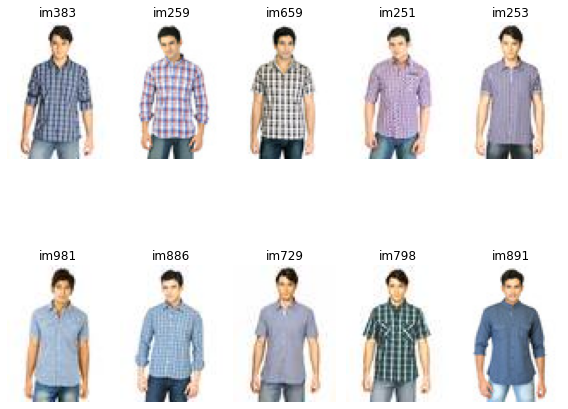

In [ ]:


# generation of a dictionary of (title, images)
figures = {'im'+str(i): cv2.imread(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 5)